In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import norm, get_data

In [2]:
# Import count data
citris_counts = pd.read_csv('citris_featurecounts.txt',sep='\t',index_col=0)
vitis_counts = pd.read_csv('vitis_featurecounts.txt',sep='\t',index_col=0)
vitis_miR_counts = pd.read_csv('vitis_miR_featurecounts.txt',sep='\t',index_col=0)
wheat_counts = pd.read_csv('wheat_featurecounts.txt',sep='\t',index_col=0)

In [3]:
# Citris TPM normalisation
citris_nm = norm()
citris_nm.tpm(df=citris_counts, gl='Length')
citris_tpm = citris_nm.tpm_norm
citris_tpm.rename(columns={"pK7WG2D_1": "Con_1", "pK7WG2D_2": "Con_2", "pK7WG2D_4": "Con_4"}, inplace=True)
citris_tpm.head()

,p689_2,p689_5,p689_6,Con_1,Con_2,Con_4
Geneid,,,,,,
MSTRG.1,296.547992,12.134848,78.792444,0.000000,0.000000,0.000000
MSTRG.2,30.192126,31.229514,33.457737,30.888330,29.636656,33.512528
MSTRG.3,13.683598,14.684575,15.571597,14.281672,17.425913,20.903688
MSTRG.4,40.432885,58.961875,68.087360,36.105502,41.811444,28.973253
MSTRG.5,51.249260,25.279279,30.314680,52.537347,36.366365,57.873072


In [4]:
# Vitis TPM normalisation
vitis_nm = norm()
vitis_nm.tpm(df=vitis_counts, gl='Length')
vitis_tpm = vitis_nm.tpm_norm
vitis_tpm.head()

,p630_1,p630_2,p630_5,pK7WG2D_1,pK7WG2D_2,pK7WG2D_4
Geneid,,,,,,
MSTRG.1,35.568152,52.364475,45.069004,33.006951,31.678181,35.780236
MSTRG.2,17.141050,11.747729,12.633653,15.072237,18.395613,22.041777
MSTRG.3,27.375259,50.411023,45.301331,36.152074,41.876950,28.985589
MSTRG.4,64.576370,60.163513,77.237416,52.582992,36.408024,57.873364
MSTRG.5,12.996108,16.735752,18.677098,16.947724,14.342175,20.959057


In [5]:
# Vitis miR TPM normalisation
vitis_miR_nm = norm()
vitis_miR_nm.tpm(df=vitis_miR_counts, gl='Length')
vitis_miR_tpm = vitis_miR_nm.tpm_norm
vitis_miR_tpm.head()

,p638_1,p638_4a,p638_4b,pK7WG2D_1,pK7WG2D_2,pK7WG2D_4
Geneid,,,,,,
MSTRG.1,46.206263,47.890710,36.308287,31.201199,30.121139,33.820701
MSTRG.2,13.477877,18.517352,16.967296,13.309795,16.340043,19.463180
MSTRG.3,61.708511,47.848175,48.979256,36.751332,42.821335,29.464260
MSTRG.4,57.168169,72.429191,78.593888,55.291458,38.508371,60.850621
MSTRG.5,14.949197,14.555022,17.428719,15.252840,12.884614,18.584557


In [6]:
# Wheat TPM normalisation
wheat_nm = norm()
wheat_nm.tpm(df=wheat_counts, gl='Length')
wheat_tpm = wheat_nm.tpm_norm
wheat_tpm.head()

,p553_2,p553_4,p553_5,pK7WG2D_1,pK7WG2D_2,pK7WG2D_4
Geneid,,,,,,
MSTRG.1,43.152042,42.380935,34.643121,32.033173,30.747292,34.797299
MSTRG.2,23.284843,14.838539,9.123431,13.560223,16.552190,19.872088
MSTRG.3,39.341096,33.831080,24.969020,36.067358,41.783831,28.978175
MSTRG.4,56.941605,32.760445,26.314546,52.643325,36.454171,58.061004
MSTRG.5,22.617058,21.640736,10.780081,18.732185,15.871272,23.262715


In [7]:
# Extract GRF-GIF transgenes (Citris = MSTRG.1; Vitis = MSTRG.21190; Vitis miR = MSTRG.20862; Wheat = MSTRG.21768)
citris_GRF = citris_tpm.loc[['MSTRG.1']].reset_index()
vitis_GRF = vitis_tpm.loc[['MSTRG.21190']].reset_index()
vitis_miR_GRF = vitis_miR_tpm.loc[['MSTRG.20862']].reset_index()
wheat_GRF = wheat_tpm.loc[['MSTRG.21768']].reset_index()
all_GRF = pd.concat([citris_GRF, vitis_GRF, vitis_miR_GRF, wheat_GRF], axis=1)
all_GRF = all_GRF.drop(['Geneid','pK7WG2D_1','pK7WG2D_2','pK7WG2D_4'], axis=1)
all_GRF = all_GRF[['Con_1', 'Con_2', 'Con_4',
                  'p689_2', 'p689_5', 'p689_6',
                  'p630_1', 'p630_2', 'p630_5',
                  'p638_1', 'p638_4a', 'p638_4b',
                  'p553_2', 'p553_4', 'p553_5']]
all_GRF
all_GRF.to_csv('GRF-GIF_TPM.csv')

In [8]:
# Transpose data
df_transposed = all_GRF.T.reset_index()
df_transposed.columns = ['Replicates', 'GRF-GIF']

# Declare a list that is to be converted into a column
conditions = ['Empty Vector', 'Empty Vector','Empty Vector',
              'Cc GRF-GIF','Cc GRF-GIF','Cc GRF-GIF',
              'Vv GRF-GIF','Vv GRF-GIF','Vv GRF-GIF',
              'Vv miR GRF-GIF','Vv miR GRF-GIF','Vv miR GRF-GIF',
              'Ta GRF-GIF','Ta GRF-GIF','Ta GRF-GIF']
df_transposed['Conditions'] = conditions

df_transposed

,Replicates,GRF-GIF,Conditions
0,Con_1,0.000000,Empty Vector
1,Con_2,0.000000,Empty Vector
2,Con_4,0.000000,Empty Vector
3,p689_2,296.547992,Cc GRF-GIF
4,p689_5,12.134848,Cc GRF-GIF
5,p689_6,78.792444,Cc GRF-GIF
6,p630_1,181.048271,Vv GRF-GIF
7,p630_2,116.467888,Vv GRF-GIF
8,p630_5,130.567427,Vv GRF-GIF
9,p638_1,142.065665,Vv miR GRF-GIF


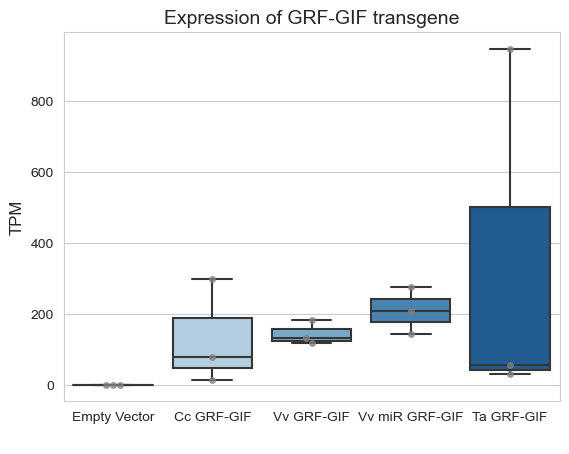

In [9]:
# Plot
sns.set_style('whitegrid')
grf_plot = sns.boxplot( x=df_transposed['Conditions'], y=df_transposed['GRF-GIF'], palette='Blues')
grf_plot = sns.swarmplot(x=df_transposed['Conditions'], y=df_transposed['GRF-GIF'], color="grey", alpha=0.8)
grf_plot.set_xlabel(' ', fontsize= 12)
grf_plot.set_ylabel('TPM', fontsize= 12)
grf_plot.set_title('Expression of GRF-GIF transgene', fontsize= 14)

plt.savefig('GRF-GIF Transgene Expression.pdf')